# # Principal Component Analysis Practical Course
For this practical course we will use Principal Component Analysis (PCA) to visualize the patients described in the Chronic_Kidney_Disease dataset.

It is **important to note that we will NOT use the labels for the PCA.** 

___

## The Data

We will use a data frame with 400 instances on the following 24 variables.
* Attribute Information:
We use 24 ( 11 numeric, 13 nominal) 

1.Age(numerical) 
age in years 

2.Blood Pressure(numerical) 
bp in mm/Hg 

3.Specific Gravity(nominal??) 
sg - (1.005,1.010,1.015,1.020,1.025) 

4.Albumin(nominal??) 
al - (0,1,2,3,4,5) 

5.Sugar(nominal??) 
su - (0,1,2,3,4,5) 

6.Red Blood Cells(nominal) 
rbc - (normal,abnormal) 

7.Pus Cell (nominal) 
pc - (normal,abnormal) 

8.Pus Cell clumps(nominal) 
pcc - (present,notpresent) 

9.Bacteria(nominal) 
ba - (present,notpresent) 

10.Blood Glucose Random(numerical)	
bgr in mgs/dl 

11.Blood Urea(numerical)	
bu in mgs/dl

12.Serum Creatinine(numerical)	
sc in mgs/dl

13.Sodium(numerical) 
sod in mEq/L 

14.Potassium(numerical)	
pot in mEq/L 

15.Hemoglobin(numerical) 
hemo in gms 

16.Packed Cell Volume(numerical) 

17.White Blood Cell Count(numerical) 
wc in cells/cumm 

18.Red Blood Cell Count(numerical)	
rc in millions/cmm 

19.Hypertension(nominal)	
htn - (yes,no) 

20.Diabetes Mellitus(nominal)	
dm - (yes,no) 

21.Coronary Artery Disease(nominal) 
cad - (yes,no) 

22.Appetite(nominal)	
appet - (good,poor) 

23.Pedal Edema(nominal) 
pe - (yes,no)	

24.Anemia(nominal) 
ane - (yes,no) 



## Mount Drive

**For google colab users only**

In [0]:
import os
from google.colab import drive

drive.mount('/content/drive')

# Change to the directory to where your files are
#os.chdir('drive/My Drive/')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importer les librairies



In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Lecture des données

** Lire le fichier csv "chronic_kidney_disease"**

In [0]:
df = pd.read_csv('chronic_kidney_disease.csv', header=0)

**L'en-tete du dataset**

In [0]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


** verifier info() et describe() méthodes.**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      330 non-null object
wbcc     295 non-null object
rbcc     270 non-null object
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(11), object(14)
memory usage: 78.2+ KB


In [0]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Data Preparation

### Séparer les variables des labels

In [0]:

data = df.drop("class", axis =1)
labels = df["class"]

### Séparer les données numeriques des données categoriques

In [0]:
# données numeriques
data_num = data[["age", "bp","sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo","pcv", "wbcc", "rbcc"]]

# données categoriques
data_cat = data[["rbc","pc","pcc","ba","htn","dm", "cad", "appet", "pe", "ane"]]


In [0]:
data_num.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [0]:
data_cat.describe()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
count,248,335,396,396,398,398,398,399,399,399
unique,2,2,2,2,2,5,3,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no
freq,201,259,354,374,251,258,362,317,323,339


### Traitement des valeurs null dans le cas des données numeriques par la mediane

In [0]:

# Numerical: 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(data_num)
data_num_tr = pd.DataFrame(X, columns = data_num.columns)



### Traitement des valeurs null dans le cas des données categoriques :
*   Factorisation : transformer les données categoriques en données numériques
*   Remplacer les valeurs nulls par les plus fréquentes

In [0]:

# factorisation
data_cat_encoded = []
data_categories = []
for x in data_cat:
    data_cat_encod, data_categ = pd.factorize(data_cat[x])
    data_cat_encoded.append(data_cat_encod)
    data_categories.append(data_categ)

# remplacer les valeurs nulls par les plus frequentes
data_cat_encoded = pd.DataFrame(np.transpose(data_cat_encoded))
data_cat_encoded.info()
imputer = SimpleImputer(missing_values= -1, strategy="most_frequent")

# remplacer dans le dataset
data_cat_enc = imputer.fit_transform(data_cat_encoded)
data_cat_tr = pd.DataFrame(data_cat_enc, columns = data_cat.columns)
data_cat_tr.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
0    400 non-null int64
1    400 non-null int64
2    400 non-null int64
3    400 non-null int64
4    400 non-null int64
5    400 non-null int64
6    400 non-null int64
7    400 non-null int64
8    400 non-null int64
9    400 non-null int64
dtypes: int64(10)
memory usage: 31.4 KB


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.117500,0.190000,0.105000,0.055000,0.632500,0.697500,0.095000,0.205000,0.190000,0.150000
std,0.322418,0.392792,0.306937,0.228266,0.482728,0.567273,0.310186,0.404207,0.392792,0.357519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000


## Fusion des données numériques et categoriques 

In [0]:
data_tr = pd.concat([data_num_tr, data_cat_tr], axis=1)
data_tr.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750,0.117500,0.190000,0.105000,0.055000,0.632500,0.697500,0.095000,0.205000,0.190000,0.150000
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439,0.322418,0.392792,0.306937,0.228266,0.482728,0.567273,0.310186,0.404207,0.392792,0.357519
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000


### Data Visualization

La visualisation des attributs


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

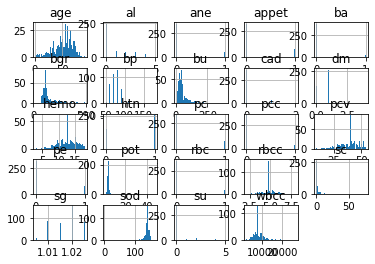

In [0]:
# Histogramme des attributs
data_tr.hist(bins=50)
plt.show()

## PCA Visualization

Comme il est difficile de visualiser des données de grande dimension, nous pouvons utiliser PCA pour trouver les deux premiers composants principaux et visualiser les données dans ce nouvel espace bidimensionnel, avec un seul nuage de points.


- Procedons d'abord à la mise à l'echelle (Scaling) des données

In [0]:
# les imports
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
# nombre d'attributs
p = data_tr.shape[1]

#nombre d'instances
n = data_tr.shape[0]

In [0]:
# StandardScaler method
scaler = StandardScaler()
scaler.fit(data_tr)
scaled_data = scaler.transform(data_tr)

- Nous allons maintenant instancier un objet PCA avec comme paramètre le nombre d'attributs (ici 24).


In [0]:
# Use PCA
pca = PCA(n_components=24) 

pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Interpretation de l'ACP



### Valeurs propres

In [0]:
# Valeurs propres
print("------------- Valeurs propres --------- \n")
print(pca.explained_variance_,"\n")

corrected_variance = ((n-1)/n)*pca.explained_variance_
print("-------------- Valeurs propres corrigés----------- \n")
print(corrected_variance)

------------- Valeurs propres --------- 

[6.84295919 1.89606773 1.70388266 1.32163419 1.21089375 1.05020013
 1.03600956 0.99450791 0.88879552 0.84201995 0.78794379 0.69687087
 0.67516175 0.60364022 0.55686503 0.49605224 0.41983674 0.40666388
 0.360372   0.32779293 0.28793117 0.27995751 0.22959089 0.14450077] 

-------------- Valeurs propres corrigés----------- 

[6.82585179 1.89132756 1.69962295 1.3183301  1.20786651 1.04757463
 1.03341953 0.99202164 0.88657353 0.8399149  0.78597393 0.6951287
 0.67347385 0.60213112 0.55547286 0.49481211 0.41878715 0.40564722
 0.35947107 0.32697345 0.28721134 0.27925762 0.22901692 0.14413952]


- Graphe des variances 

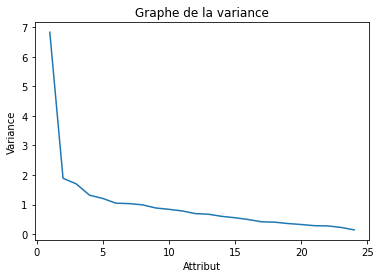

In [0]:
# Graphe de la variance de chaque attribut
plt.plot(np.arange(1,p+1),corrected_variance)
plt.title("Graphe de la variance")
plt.ylabel("Variance")
plt.xlabel("Attribut")
plt.show()

- Pourcentage de variance 

In [0]:
pca.explained_variance_ratio_*100

array([28.44104911,  7.88053149,  7.0817623 ,  5.4930421 ,  5.03277714,
        4.3648943 ,  4.30591472,  4.1334235 ,  3.69405638,  3.49964542,
        3.27489137,  2.89636957,  2.80614104,  2.50887965,  2.31447026,
        2.06171713,  1.74494646,  1.69019675,  1.49779613,  1.36238936,
        1.19671391,  1.16357342,  0.95423716,  0.60058133])

- Variance cumulée

In [0]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
cumulative_var

array([ 28.44104911,  36.32158061,  43.40334291,  48.89638501,
        53.92916215,  58.29405645,  62.59997118,  66.73339468,
        70.42745106,  73.92709648,  77.20198785,  80.09835741,
        82.90449845,  85.4133781 ,  87.72784837,  89.78956549,
        91.53451195,  93.2247087 ,  94.72250483,  96.08489419,
        97.2816081 ,  98.44518152,  99.39941867, 100.        ])

- Graphe des variances cumulées

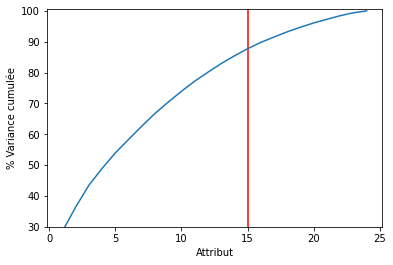

In [0]:
 # plot the explained variance of each component
plt.ylabel('% Variance cumulée')
plt.xlabel('Attribut')
plt.axvline(x=15,color='red')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)

---------------- Les differentes composantes principales ------------- 

         age        bp        sg  ...     appet        pe       ane
0   0.126814  0.130849 -0.230326  ...  0.198411  0.199842  0.197302
1  -0.092515  0.017411  0.171438  ...  0.014453  0.028215  0.253380
2  -0.331895 -0.114398 -0.097639  ...  0.056881  0.120339  0.057148
3  -0.096382  0.013386 -0.015465  ... -0.338482 -0.185585 -0.125829
4   0.077233 -0.150265 -0.038934  ... -0.069304 -0.112071 -0.301265
5   0.311241 -0.293899  0.000745  ... -0.107645 -0.140929  0.023779
6   0.014629 -0.533839  0.134887  ...  0.281151  0.575996 -0.271628
7  -0.386769 -0.186952 -0.199919  ... -0.100285 -0.072662  0.137278
8   0.201712  0.530476 -0.004850  ...  0.162320  0.076830 -0.273442
9  -0.254945 -0.149082 -0.303967  ... -0.300154  0.033753 -0.187787
10  0.529224 -0.133413 -0.218969  ... -0.249897 -0.086167 -0.112987
11 -0.232131  0.324578  0.155983  ...  0.172317  0.140632 -0.050291
12  0.027368  0.145444 -0.572506  ...  0.17

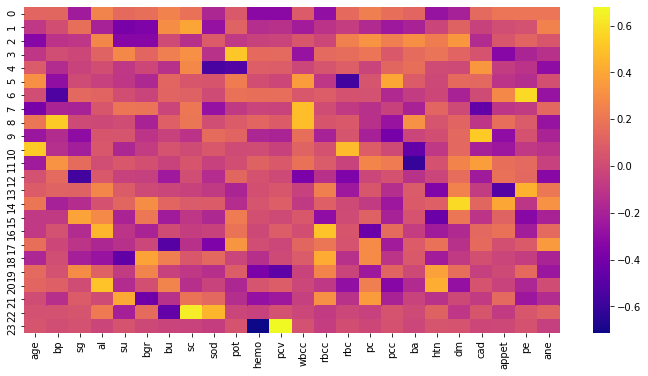

In [0]:
df_comp = pd.DataFrame(pca.components_,columns=data_tr.columns)
print("---------------- Les differentes composantes principales ------------- \n")
print(df_comp)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

Le heatmap montre la correlation qu'il y a entre les attributs et les composantes principales.


## Variable representation

**Calcul de la correlation**

In [0]:

# Calcul de correlation des variables  
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))


for k in range(p):
  corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

# Matrice de correlation "variables x factors"
print(corvar)

[[ 3.31317583e-01 -1.27231076e-01 -4.32689872e-01 -1.10664490e-01
   8.48813869e-02  3.18558706e-01  1.48716250e-02 -3.85223268e-01
   1.89927619e-01 -2.33648733e-01  4.69184469e-01 -1.93537815e-01
   2.24593657e-02  6.24319457e-02  1.50742262e-01 -5.93030130e-02
  -5.49258780e-02  1.09088934e-01 -1.07530306e-01  8.15852896e-02
   6.89815123e-02  5.01324765e-03  1.36648459e-02  1.63466726e-02]
 [ 3.41860372e-01  2.39450580e-02 -1.49140638e-01  1.53694907e-02
  -1.65145992e-01 -3.00809261e-01 -5.42685904e-01 -1.86204851e-01
   4.99486184e-01 -1.36629214e-01 -1.18277798e-01  2.70615261e-01
   1.19359057e-01  9.10769065e-02 -1.52766913e-01 -5.71203996e-02
   1.75183697e-02 -1.10592535e-02  8.63695965e-03  1.62623890e-02
   5.31952346e-02 -6.95581280e-02  1.26512112e-02  4.96339853e-03]
 [-6.01758100e-01  2.35771108e-01 -1.27292139e-01 -1.77566171e-02
  -4.27891278e-02  7.62287077e-04  1.37122680e-01 -1.99119410e-01
  -4.56654452e-03 -2.78576235e-01 -1.94127173e-01  1.30049620e-01
  -4.698

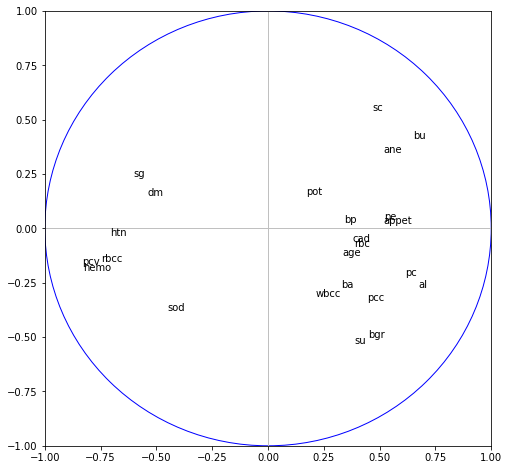

In [0]:
# Plot the correlation circle

# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(data_tr.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()